
### Modeling and Evaluation Notebook

**Objectives**
- Answer business requirement 2:
    + The client is interested in predicting if a cherry tree is healthy or contains powdery mildew.

**Inputs**
- inputs/cherry_leaves_dataset/cherry-leaves/train/
- inputs/cherry_leaves_dataset/cherry-leaves/test/
- inputs/cherry_leaves_dataset/cherry-leaves/validation/
- image_embeddings

**Outputs**
1. Images distribution plot in train, validation, and test set
2. Image augmentation
3. Save class_indices
4. Machine learning model creation and training
    > **Rationale behind the hyperparameters choices:**
    - **Filters:** Different numbers of filters are used to capture the variety of features at different levels of granularity.
    - **Kernel Size:** Varied sizes to see how different receptive field sizes affect feature extraction.
    - **Activation Function:** Common functions like 'relu' are used for their efficiency and effectiveness in non-linear transformation. 'tanh' is considered for its range and characteristics.
    LeakyReLU is not just a string identifier but an actual layer that needs to be added differently than relu and tanh because it may require an alpha parameter that specifies the slope for the negative part of the function.
    - **Dense Units:** Multiple options to experiment with the model's capacity to learn from the high-level features.
    - **Dropout Rate:** Included to mitigate overfitting, with different rates to find the optimal balance.
    - **Optimizer:** Different optimizers to observe how they influence the convergence rate and training stability.

    > **Rationale behind the choices of the following:**
    - **MaxPooling2D:** is commonly used in convolutional neural networks (CNNs) to reduce feature map dimensions and emphasize dominant features.
    - **Output Layer Activation:** 'softmax' is used even for binary classification to provide a distribution over two classes which makes it more general and adaptable for extending to multi-class without changing the architecture logic.
    - **Loss Function:** 'categorical_crossentropy' is chosen due to the use of 'softmax'; even though it's binary classification, including binary with 2 output nodes, treating it as a 2-class categorical problem can give more detailed probabilistic outputs.
    - **Early Stopping:** is a callback in Keras that prevents overfitting by stopping the training process early if the model's performance stops improving on a validation metric.
    - **`monitor='val_loss'`:** tells EarlyStopping to monitor the validation loss during training. If the validation loss stops decreasing (improving) over a number of epochs, training will stop.
    - **`patience=3:`** specifies that the training will be stopped if there is no improvement in the monitored metric for 3 consecutive epochs. This allows for some fluctuation in the metric but cuts off training to save time and resources and prevent overfitting.
    - **`epochs=25:`** The number of times the learning algorithm will work through the entire training dataset.
    - **`verbose=1`:** This argument controls the verbosity of the training process output. 1 means that the progress bar and a little more detail will be shown.
    - **`to_categorical`:** Labels for training and validation sets are converted to one-hot encoded format using to_categorical to match the rank (ndim) of arguments `target` and `output`.

5. Save model
- It saves the entire trained model to a file in the HDF5 format. 
- This file includes:
    + The model architecture.
    + The model weights.
    + The training configuration (loss, optimizer).
    + The state of the optimizer, so training can be resumed exactly where it was left off.
- Learning curve plot for model performance
- Model evaluation on pickle file
- Prediction on the random image file

**Additional Comments | Insights | Conclusions**

____________________________________________________________________________________________________


### **Set Data Directory**
__________________________________________________________________________________________

**Import libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.image import imread

**Set Working Directory**

In [3]:
cwd= os.getcwd()

In [4]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

**Set input directories**

Set train, validation and test paths

In [6]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

**Set output directory**


- Organize files in a version-controlled manner
- This code is checking if a specific version of output files or directories already exists, and if it does, it suggests that a new version should be created. 
- If the version does not exist, it creates the necessary directory structure to store the files for that version.

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


**Set labels names**

In [8]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


**Set image file size embeddings**

In [9]:
version = 'v1'
image_size = joblib.load('outputs/v1/image_embeddings.joblib')
image_size

{'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG': array([5.4298244e+00, 2.7398005e-04, 7.2061890e-01, ..., 3.8319865e-01,
        9.5334125e-01, 3.4293011e-01], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG': array([6.928287  , 0.0500761 , 0.8589183 , ..., 0.5745407 , 0.35898665,
        0.03467656], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG': array([3.088735  , 0.01270527, 1.296147  , ..., 1.0502157 , 0.88481504,
        0.03241634], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG': array([1.3175539 , 0.00485275, 1.8822621 , ..., 0.5286861 , 0.1618286 ,
        0.20590004], dtype=float32),
 'inputs/cherry_leaves_dataset/cherry-leaves/train/healthy/0048afb8-b950-4c57-9

____________________________________________________________________________________________________

1. **Images distribution plot in train, validation, and test set**

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




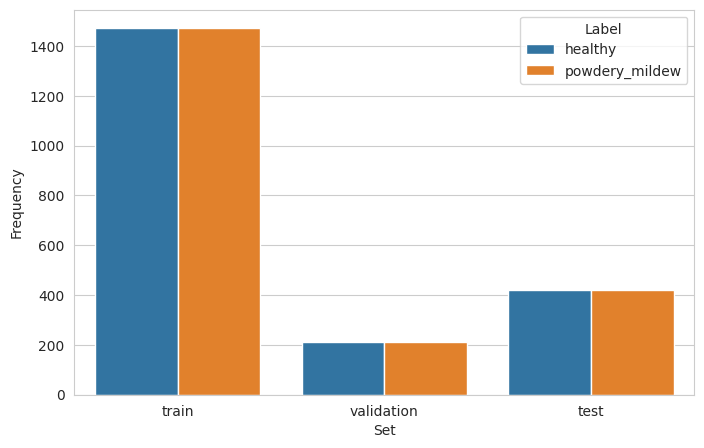

In [10]:
# Initialize a list to store the data
data = []

# Iterate through each set (train, validation, test)
for folder in ['train', 'validation', 'test']:
    # Iterate through each label within the folder
    for label in labels:
        path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(path):
            # Count the number of images in each label's directory
            image_count = len(os.listdir(path)) if os.path.exists(path) else 0

        # Append a new row to the data list with the count information
        data.append({'Set': folder, 'Label': label, 'Frequency': image_count})

        # Print out the count of images for each label within each set
        print(f"* {folder} - {label}: {image_count} images")

# Print a newline for neatness in output
print("\n")

# Create the DataFrame after collecting all data
df_freq = pd.DataFrame(data)

# Set the style of the plot to 'whitegrid' for better grid visibility
sns.set_style("whitegrid")

# Create a figure for the plot with specified size
plt.figure(figsize=(8, 5))

# Generate a bar plot from the frequency DataFrame
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

# Specify the file path to save the generated bar plot
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)

# Display the plot
plt.show()


2. **Image data augmentation**

ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-08 12:44:47.980091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intiatize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset

In [13]:
batch_size = 32
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=(150, 150),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=(150, 150),
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=(150, 150),
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

- Plot augmented training image

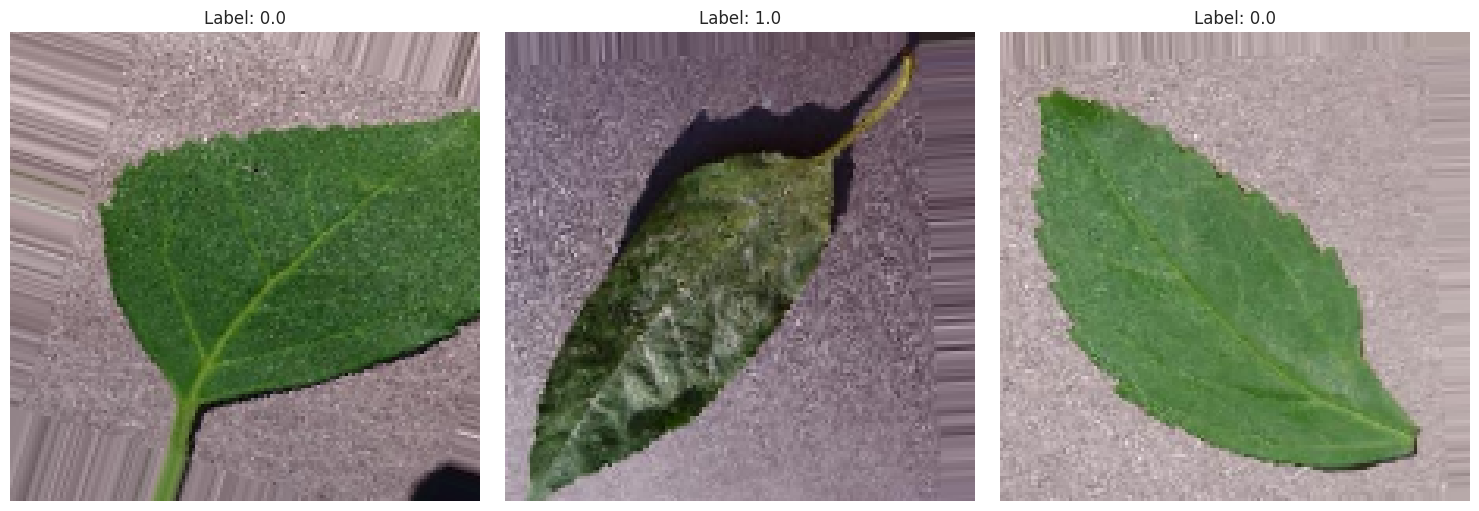

In [16]:
def plot_images(images_arr, labels_arr, num_images=3):
    """
    Take an array of images and labels, and an optional
    num_images parameter specifying how many images to plot
    """
    # Ensure not to try to plot more images than we have
    num_images = min(num_images, len(images_arr))

    # Set up the plot with one row and 'num_images' columns
    # Figure size is dynamically adjusted based on the number of images
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    if num_images == 1:
        axes = [axes]

    # Loop through the first 'num_images' images and plot them
    for i in range(num_images):
        # Get the subplot axis
        ax = axes[i]
        # Get the image
        img = images_arr[i]
        # Get the label
        label = labels_arr[i]
        # Show the image on the subplot
        ax.imshow(img)
        # Set the title of the subplot to the image's label
        ax.set_title(f"Label: {label}")
        # Turn off the axis to only show the image
        ax.axis('off')

    # Adjust the layout so everything fits without overlapping
    plt.tight_layout()
    plt.show()

# Fetch a batch of images and labels from the train_set iterator
images, labels = next(train_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

- Plot augmented validation and test images

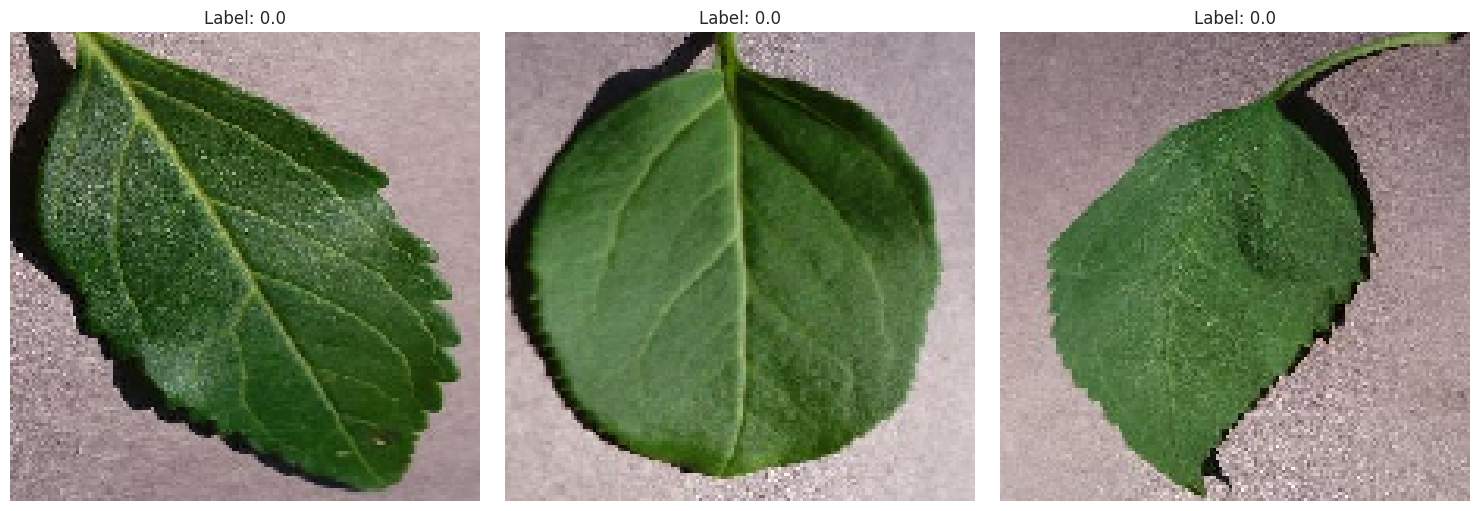

In [17]:
# Fetch a batch of images and labels from the validation_set iterator
images, labels = next(validation_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

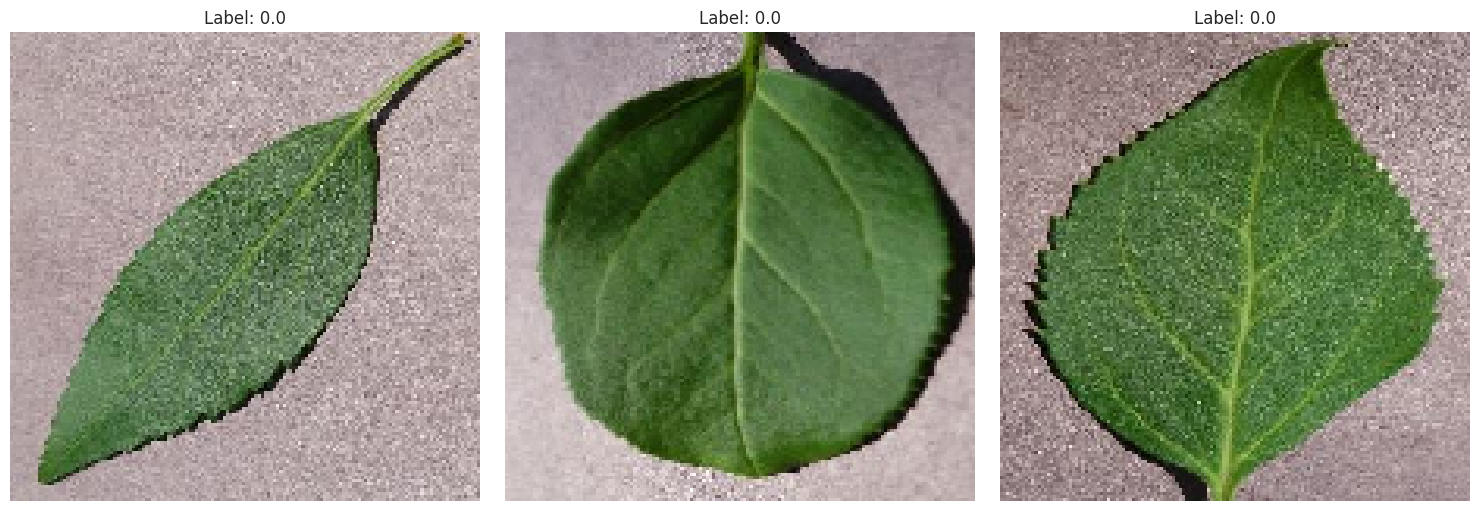

In [18]:
# Fetch a batch of images and labels from the test_set iterator
images, labels = next(test_set)

# Plot the first 3 images from the batch
plot_images(images, labels, num_images=3)

3. **Save class_indices**

In [19]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

________________________________________________________________
### Model Creation and Training
________________________________________________________________

Import model packages


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

4. **Machine learning model creation and training**

In [21]:
def create_tf_model(image_shape=(150, 150, 3)):

    """
    Create a TensorFlow CNN model with specific hyperparameters
    """

    # Define hyperparameters with three distinct acceptable values each
    filter_options = [32, 64, 128]
    kernel_size_options = [(3, 3), (5, 5), (7, 7)]
    activation_options = ['relu', 'tanh', 'sigmoid']
    dense_unit_options = [64, 128, 256]
    dropout_rate_options = [0.2, 0.5, 0.8]
    optimizer_options = [Adam(learning_rate=0.001), SGD(learning_rate=0.01), RMSprop(learning_rate=0.001)]

    # Building the model
    model = Sequential()

    # First Conv2D layer
    model.add(Conv2D(filters=filter_options[0], kernel_size=kernel_size_options[0],
                     input_shape=image_shape, activation=activation_options[0]))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D layer
    model.add(Conv2D(filters=filter_options[1], kernel_size=kernel_size_options[1],
                     activation=activation_options[1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Conv2D layer
    model.add(Conv2D(filters=filter_options[2], kernel_size=kernel_size_options[2],
                     activation=activation_options[0]))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output into a vector for the Dense layer
    model.add(Flatten())

    # Dense layer
    model.add(Dense(dense_unit_options[1], activation=activation_options[0]))

    # Dropout layer to avoid overfitting
    model.add(Dropout(dropout_rate_options[1]))

    # Output layer for binary classification with softmax (2 units)
    model.add(Dense(2, activation='softmax'))

    # Choose an optimizer
    optimizer = optimizer_options[0]

    # Compiling the model with the chosen optimizer and setting loss and metrics
    model.compile(optimizer=optimizer_options[0], loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Model Summary

In [22]:
model = create_tf_model()
model.summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,665,346 (13.98 MB)

 Trainable params: 3,665,346 (13.98 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

Fit model for model training

In [24]:
# Ensure One-Hot Encoding for Labels
train_labels = to_categorical(train_set)
validation_labels = to_categorical(validation_set)

model.fit(
    x=train_features,
    y=train_labels,
    epochs=25,
    batch_size=32,
    validation_data=(validation_features, validation_labels),
    callbacks=[early_stop],
    verbose=1
)

5. **Save model**

In [ ]:
# model.save('outputs/v1/powdery_mildew_detector_model.h5')